<a href="https://colab.research.google.com/github/hyuna0926/ds-sa-cp2/blob/main/Movielens_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# movie데이터

## user 데이터 합치기

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import chardet
import matplotlib.pyplot as plt


In [12]:
#u.data
columns_name=['user_id','movie_id','rating','timestamp']
data = pd.read_csv('/content/drive/MyDrive/ml-100k/u.data', sep='\t',names=columns_name)
print(data.head())
data.shape

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


(100000, 4)

In [13]:
#u.user
columns = ['user_id','age','gender','occupation','zipcode']
user = pd.read_csv('/content/drive/MyDrive/ml-100k/u.user', sep='\|', names=columns)
print(user.head())
user.shape

   user_id  age gender  occupation zipcode
0        1   24      M  technician   85711
1        2   53      F       other   94043
2        3   23      M      writer   32067
3        4   24      M  technician   43537
4        5   33      F       other   15213


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(943, 5)

In [14]:
#u.data, u.user 합치기
df=pd.merge(data,user,on='user_id')
df

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105
...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229
99996,941,273,3,875049038,20,M,student,97229
99997,941,1,5,875049144,20,M,student,97229
99998,941,294,4,875048532,20,M,student,97229


In [15]:
df.drop('zipcode',axis=1,inplace=True)

In [ ]:
# df.to_csv('user_data.csv')

## item 데이터 합치기

 1. 연결할 데이터셋 오픈

In [7]:
# 파일 오픈할 때, UnicodeDecodeError 발생시 encoding 타입 확인을 위한 함수 작성
def check_encoding(file_path) :
    with open(file_path, 'rb') as rawdata:
        encoding_data = chardet.detect(rawdata.read())
        print(f"인코딩 타입 : {encoding_data['encoding']}")
        print(f"신뢰도 : {encoding_data['confidence']}")
    return

In [9]:
# 연결할 데이터 확인
file_path = "/content/drive/MyDrive/ml-100k/u.item"
check_encoding(file_path)

인코딩 타입 : ISO-8859-1
신뢰도 : 0.73


In [10]:
# 데이터를 데이터프레임 형식으로 오픈
col_names = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
             "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movie_df = pd.read_csv(file_path, sep='|', names=col_names, encoding='ISO-8859-1')
movie_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


2. 하나의 데이터프레임 병합

In [16]:
# 병합할 칼럼을 제외한 칼럼 드랍
moive_id_genre = movie_df.drop(["release_date", "video_release_date", "IMDb_URL"], axis=1)

In [17]:
use_df = pd.merge(df, moive_id_genre)
use_df

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,B. Monkey (1998),0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,Mat' i syn (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,Sliding Doors (1998),0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,You So Crazy (1994),0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
unknown = use_df['movie_title'] !='unknown'
use_df = use_df[unknown]

In [31]:
use_df.to_csv('total_movie_rating.csv')

## 데이터 EDA



In [32]:
df = pd.read_csv('/content/drive/MyDrive/ml-100k/total_movie_rating.csv', index_col=0)
df

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,B. Monkey (1998),0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,Mat' i syn (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,Sliding Doors (1998),0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,You So Crazy (1994),0,0,...,0,0,0,0,0,0,0,0,0,0


### 1. user에 대한 EDA

#### user 직업

In [23]:
sns.set_palette('Set3')

In [33]:
# user 직업 분포
df['occupation'].value_counts()

student          21956
other            10662
educator          9441
engineer          8174
programmer        7800
administrator     7479
writer            5535
librarian         5273
technician        3505
executive         3403
healthcare        2804
artist            2308
entertainment     2094
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               900
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

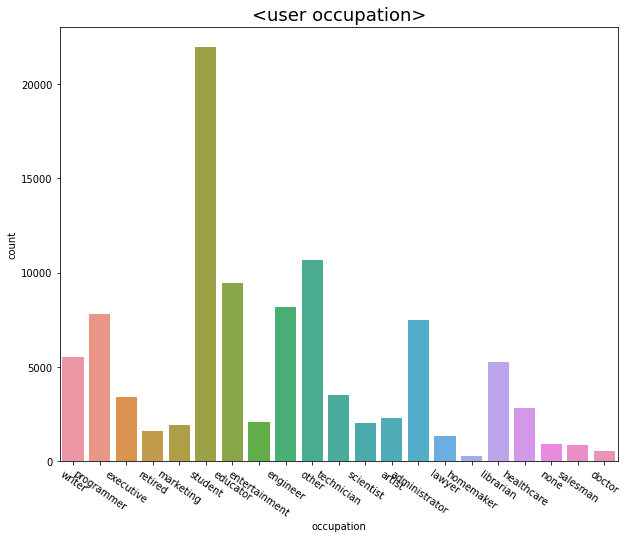

In [34]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=-35)
sns.countplot(x='occupation',data=df)
plt.title('<user occupation>',size=18)
plt.show

#### user 성별

In [35]:
# user 성별 남자 약 71%, 여자 약 29%
df['gender'].value_counts(normalize=True)

M    0.742597
F    0.257403
Name: gender, dtype: float64

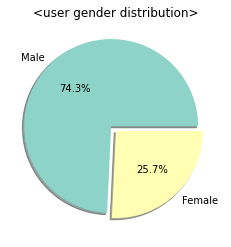

In [36]:
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%.1f%%',
        explode=[0.08,0],shadow=True)
plt.title('<user gender distribution>')
plt.show()

#### user age

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '<user age distribution>')

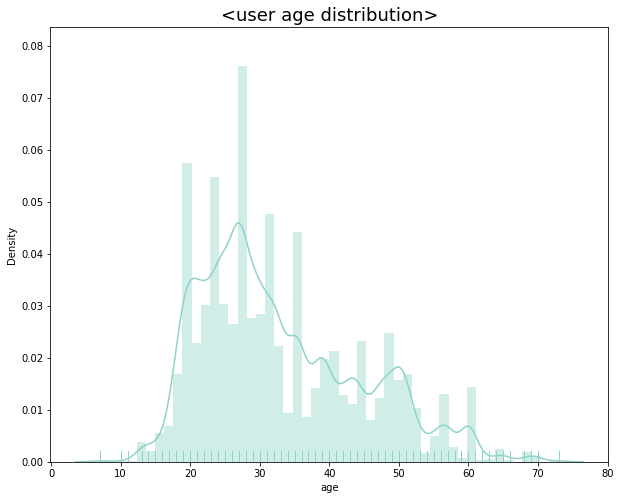

In [37]:
# user age
# sns.kdeplot(user['age'])
plt.figure(figsize=(10,8))
sns.distplot(df['age'],kde=True, rug=True)
plt.title('<user age distribution>',size=18)

#### 평점 비율

In [38]:
df['rating'].value_counts()

4    34170
3    27142
5    21200
2    11370
1     6109
Name: rating, dtype: int64

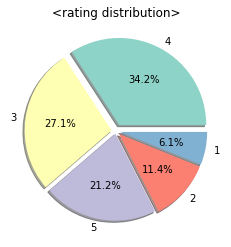

In [39]:
plt.pie(df['rating'].value_counts(),labels=['4','3','5','2','1'],autopct='%.1f%%',
        explode=[0.08,0.05,0.03,0.05,0.05],shadow=True)
plt.title('<rating distribution>')
plt.show()

### 2. movie에 대한 EDA
1. 서브 데이터프레임 생성
2. 시각화 진행

In [40]:
# 영화ID가 같은 데이터를 제거한 서브 데이터프레임 생성
sub_df = df.drop_duplicates(['movie_id'])
sub_df

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
117,196,393,4,881251863,49,M,writer,Mrs. Doubtfire (1993),0,0,...,0,0,0,0,0,0,0,0,0,0
309,196,381,4,881251728,49,M,writer,Muriel's Wedding (1994),0,0,...,0,0,0,0,0,1,0,0,0,0
409,196,251,3,881251274,49,M,writer,Shall We Dance? (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
455,196,655,5,881251793,49,M,writer,Stand by Me (1986),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,B. Monkey (1998),0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,Mat' i syn (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,Sliding Doors (1998),0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,You So Crazy (1994),0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# 장르별 정보를 나타내기 위한 딕셔너리 생성
genre = {
    "genre_name" : [],
    "number_of_movie" : [],
    "ratings_average" : []
}

for index in range(8, 27) :
    genre_name = sub_df.columns[index]
    genre["genre_name"].append(genre_name)
    genre["number_of_movie"].append(len(sub_df[sub_df[genre_name] == 1]))
    genre["ratings_average"].append(df[df[genre_name] == 1].rating.mean().round(2))

# 데이터프레임으로 변경
genre_df = pd.DataFrame({
    'genre_name' : genre["genre_name"],
    'number_of_movie' : genre["number_of_movie"],
    'ratings_average' : genre["ratings_average"]
})
genre_df

,genre_name,number_of_movie,ratings_average
0,unknown,1,1.00
1,Action,251,3.48
2,Adventure,135,3.50
3,Animation,42,3.58
4,Children's,122,3.35
5,Comedy,505,3.39
6,Crime,109,3.63
7,Documentary,50,3.67
8,Drama,725,3.69
9,Fantasy,22,3.22


#### 장르별 영화 개수

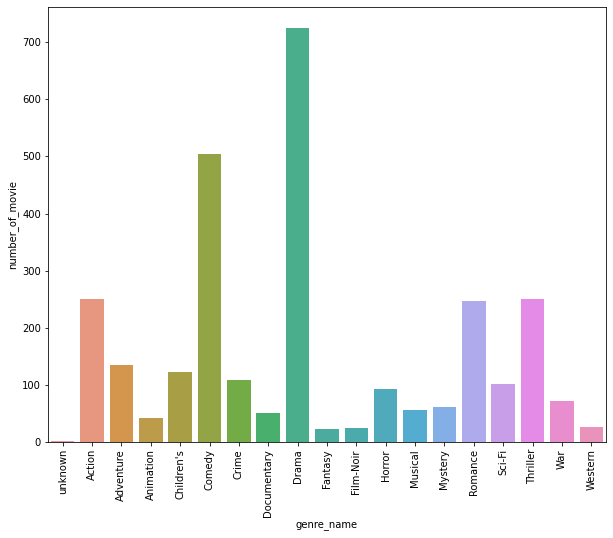

In [42]:
# 장르별 영화 개수 시각화
plt.figure(figsize=(10, 8))
plt.title('', fontsize=20)
sns.barplot(data= genre_df,x='genre_name', y='number_of_movie')
plt.xticks(rotation=90)
plt.show()

#### 장르별 평점 평균 시각화

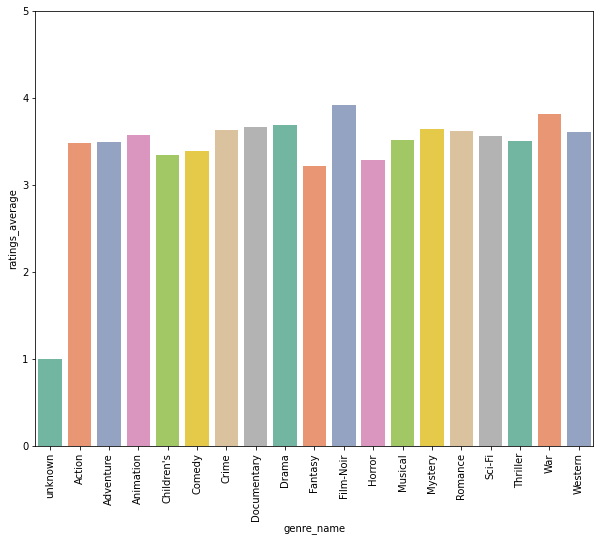

In [43]:
plt.figure(figsize=(10, 8))
plt.title('', fontsize=20)
plt.ylim(0, 5)
sns.barplot(data= genre_df,x='genre_name', y='ratings_average', palette='Set2')
plt.xticks(rotation=90)
plt.show()